# Image Segmentation Using K-Means Clustering

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


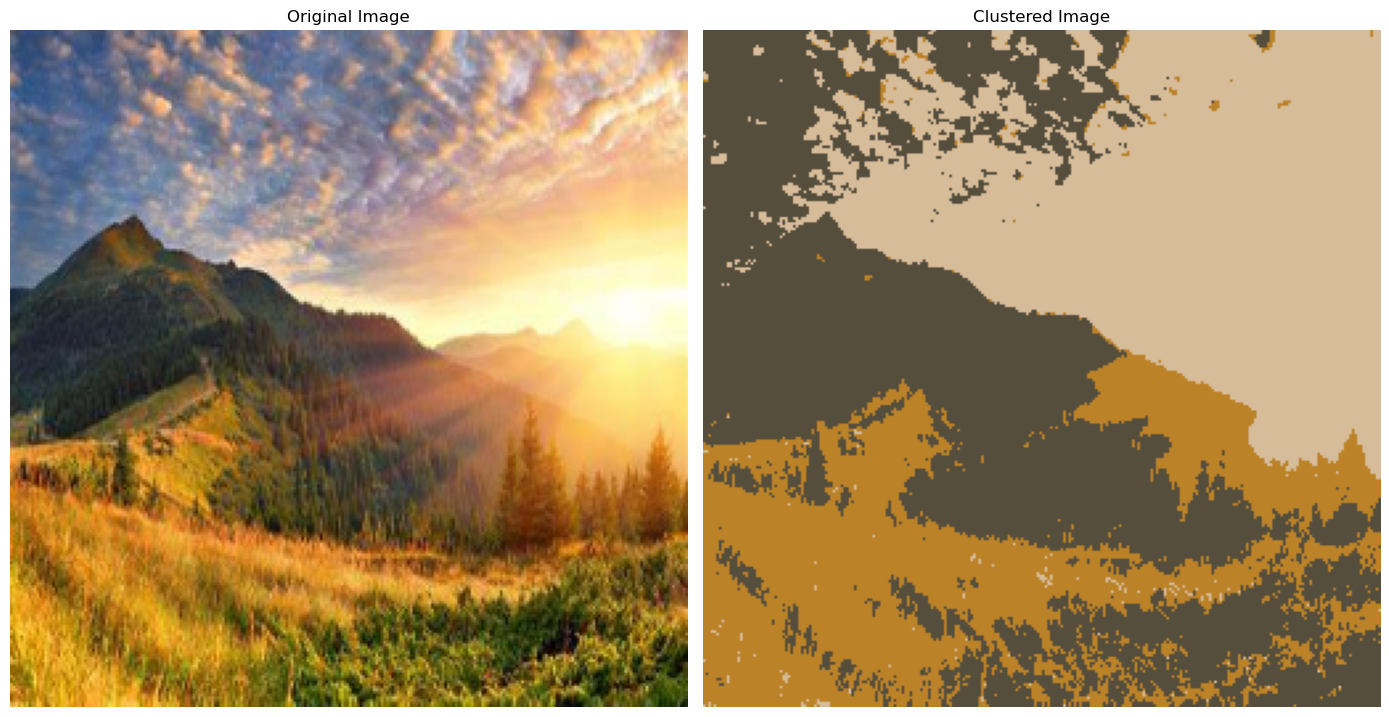

In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, resize_dim=(256, 256)):
    """
    Load an image, convert to RGB, and resize it.
    """
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, resize_dim)
    return image_resized

def apply_kmeans_clustering(image, k):
    """
    Apply k-means clustering to an image.
    """
    flattened_image = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(flattened_image)
    clustered_image = kmeans.labels_.reshape(image.shape[:2])
    cluster_centers = np.round(kmeans.cluster_centers_).astype(int)
    return clustered_image, cluster_centers

def map_clusters_to_colors(clustered_image, cluster_centers):
    """
    Map cluster labels to corresponding cluster center colors.
    """
    output_image = np.zeros((*clustered_image.shape, 3), dtype=np.uint8)
    for cluster_idx, color in enumerate(cluster_centers):
        output_image[clustered_image == cluster_idx] = color
    return output_image

def display_images(original_image, clustered_image):
    """
    Display the original and clustered images.
    """
    plt.figure(figsize=(14, 14))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Clustered Image")
    plt.imshow(clustered_image)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    image_path = "C:\\Users\\Venu Kumar S\\OneDrive\\Desktop\\IC.jpg"  # Replace with your image path
    k_clusters = 3

    # Process image and apply clustering
    image = load_and_preprocess_image(image_path)
    clustered_image, cluster_centers = apply_kmeans_clustering(image, k_clusters)
    output_image = map_clusters_to_colors(clustered_image, cluster_centers)

    # Display results
    display_images(image, output_image)


# Edge Detection Using Gaussian Blur and Canny Algorithm

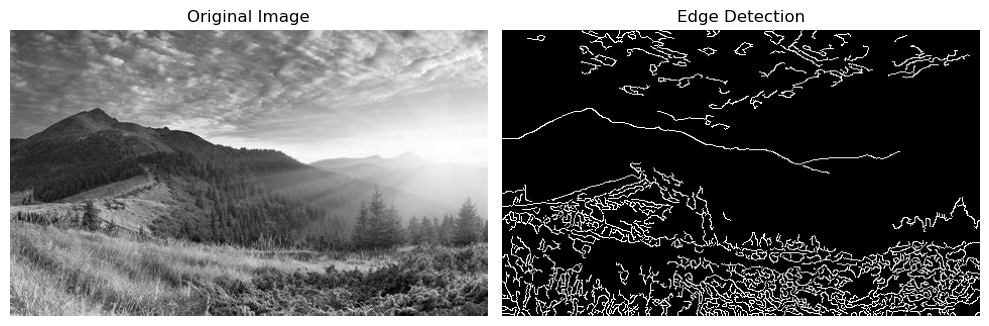

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image_grayscale(image_path):
    """
    Load an image in grayscale mode.
    """
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def apply_gaussian_blur(image, kernel_size=(5, 5)):
    """
    Apply Gaussian blur to the image to reduce noise.
    """
    return cv2.GaussianBlur(image, kernel_size, 0)

def detect_edges(image, low_threshold=50, high_threshold=150):
    """
    Detect edges in the image using the Canny Edge Detector.
    """
    return cv2.Canny(image, low_threshold, high_threshold)

def display_images(original, processed, titles):
    """
    Display the original and processed images side by side using Matplotlib.
    """
    plt.figure(figsize=(10, 5))
    
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.title(titles[0])
    plt.imshow(original, cmap="gray")
    plt.axis("off")
    
    # Display the processed image
    plt.subplot(1, 2, 2)
    plt.title(titles[1])
    plt.imshow(processed, cmap="gray")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Path to your test image
    img_path = "C:\\Users\\Venu Kumar S\\OneDrive\\Desktop\\IC.jpg"  # Replace this with your image path

    # Process the image
    grayscale_image = load_image_grayscale(img_path)
    blurred_image = apply_gaussian_blur(grayscale_image)
    edge_detected_image = detect_edges(blurred_image)

    # Display results
    display_images(
        grayscale_image,
        edge_detected_image,
        titles=["Original Image", "Edge Detection"]
    )


# Foreground Extraction Using Thresholding and Morphological Operations

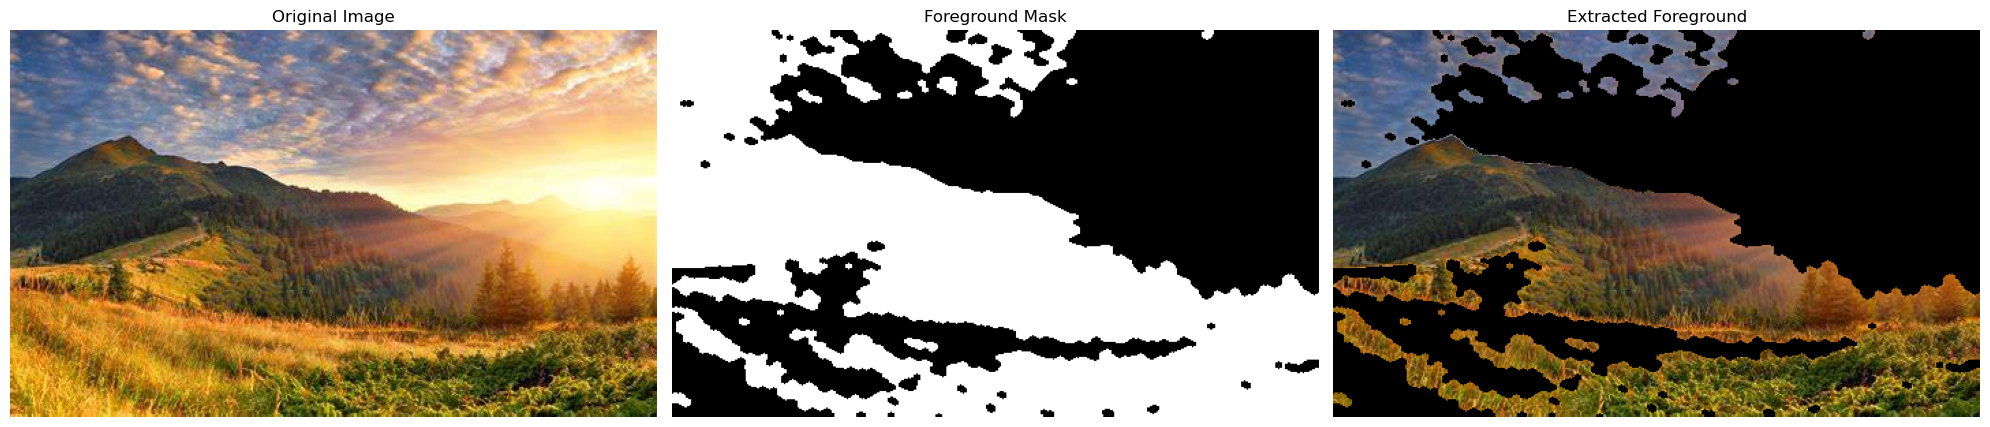

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    """
    Load an image and convert it to grayscale.
    """
    image = cv2.imread(image_path)
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, grayscale

def apply_gaussian_blur(image, kernel_size=(5, 5)):
    """
    Apply Gaussian blur to reduce noise in the image.
    """
    return cv2.GaussianBlur(image, kernel_size, 0)

def threshold_image(image, threshold_value=127):
    """
    Perform binary thresholding to create a mask.
    """
    _, mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return mask

def refine_mask(mask, kernel_size=(5, 5)):
    """
    Refine the mask using morphological operations.
    """
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
    closed_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    opened_mask = cv2.morphologyEx(closed_mask, cv2.MORPH_OPEN, kernel)
    return opened_mask

def extract_foreground(image, mask):
    """
    Extract the foreground from the image using the mask.
    """
    inverted_mask = cv2.bitwise_not(mask)
    foreground = cv2.bitwise_and(image, image, mask=inverted_mask)
    return inverted_mask, foreground

def display_results(original, mask, foreground):
    """
    Display the original image, foreground mask, and extracted foreground.
    """
    plt.figure(figsize=(20, 10))

    # Original image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    # Foreground mask
    plt.subplot(1, 3, 2)
    plt.title("Foreground Mask")
    plt.imshow(mask, cmap="gray")
    plt.axis("off")

    # Extracted foreground
    plt.subplot(1, 3, 3)
    plt.title("Extracted Foreground")
    plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    img_path = "C:\\Users\\Venu Kumar S\\OneDrive\\Desktop\\IC.jpg"  # Replace with your image path

    # Process image
    original_image, grayscale_image = load_and_preprocess_image(img_path)
    blurred_image = apply_gaussian_blur(grayscale_image)
    mask = threshold_image(blurred_image)
    refined_mask = refine_mask(mask)
    inverted_mask, foreground_image = extract_foreground(original_image, refined_mask)

    # Display results
    display_results(original_image, inverted_mask, foreground_image)


# Segmentations for different K values

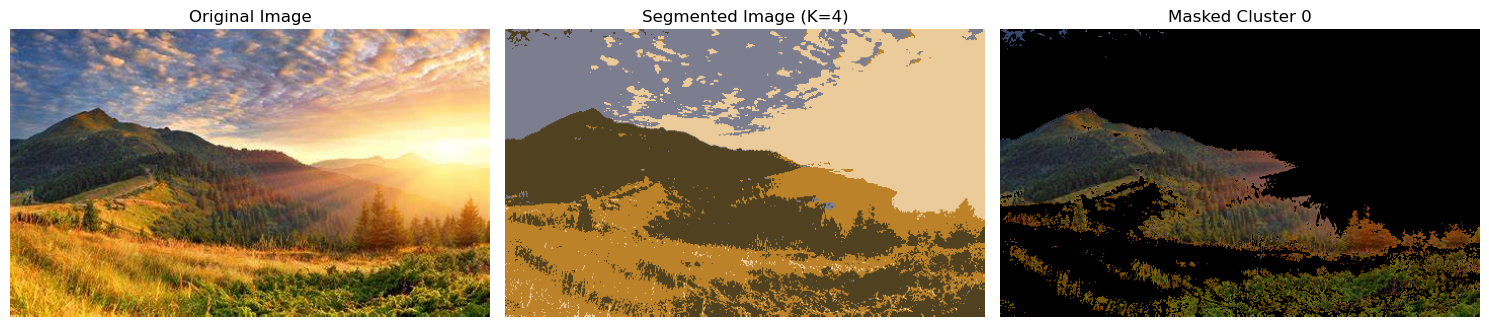

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_convert_image(image_path):
    """
    Load an image and convert it to RGB format for visualization.
    """
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def reshape_image(image):
    """
    Reshape the image into a 2D array of pixel values and convert to float32.
    """
    return image.reshape((-1, 3)).astype(np.float32)

def perform_kmeans_clustering(pixel_values, k, max_iter=10, epsilon=1.0):
    """
    Perform k-means clustering on the image pixel values.
    """
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    return labels, np.uint8(centers)

def create_segmented_image(centers, labels, original_shape):
    """
    Map cluster centers to pixel values and reshape to the original image dimensions.
    """
    segmented = centers[labels.flatten()]
    return segmented.reshape(original_shape)

def create_masked_cluster(image, labels, cluster_id):
    """
    Create a masked image for a specific cluster, setting all other pixels to black.
    """
    masked = np.copy(image)
    masked = masked.reshape((-1, 3))
    masked[labels.flatten() != cluster_id] = [0, 0, 0]
    return masked.reshape(image.shape)

def display_images(original, segmented, masked, k, cluster_id):
    """
    Display the original image, segmented image, and masked cluster.
    """
    plt.figure(figsize=(15, 8))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original)
    plt.axis("off")
    
    # Segmented image
    plt.subplot(1, 3, 2)
    plt.title(f"Segmented Image (K={k})")
    plt.imshow(segmented)
    plt.axis("off")
    
    # Masked cluster
    plt.subplot(1, 3, 3)
    plt.title(f"Masked Cluster {cluster_id}")
    plt.imshow(masked)
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    img_path = "C:\\Users\\Venu Kumar S\\OneDrive\\Desktop\\IC.jpg"  # Replace this with your uploaded image's path

    # Load and preprocess the image
    image_rgb = load_and_convert_image(img_path)
    pixel_values = reshape_image(image_rgb)

    # Perform k-means clustering
    k = 4
    labels, centers = perform_kmeans_clustering(pixel_values, k)

    # Generate segmented and masked images
    segmented_image = create_segmented_image(centers, labels, image_rgb.shape)
    cluster_id = 0
    masked_image = create_masked_cluster(image_rgb, labels, cluster_id)

    # Display the results
    display_images(image_rgb, segmented_image, masked_image, k, cluster_id)


Displaying all clusters:


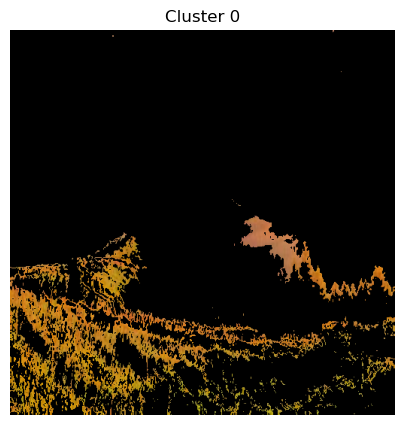

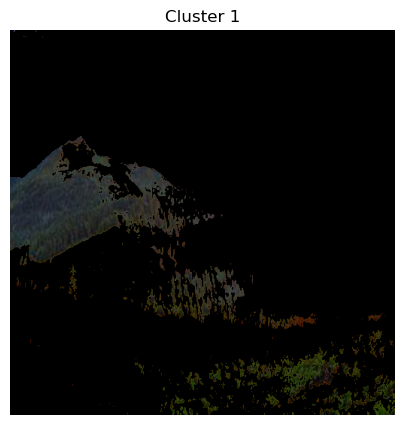

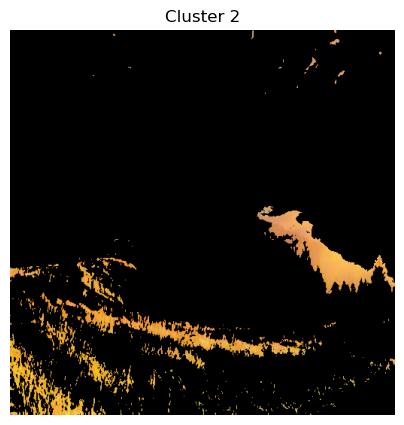

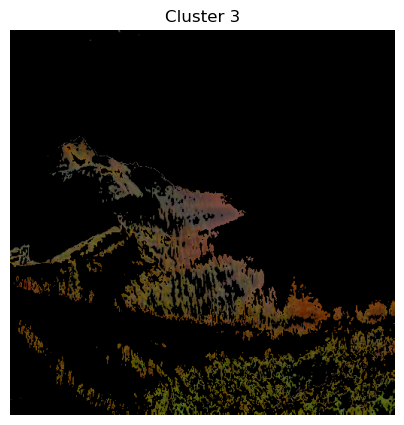

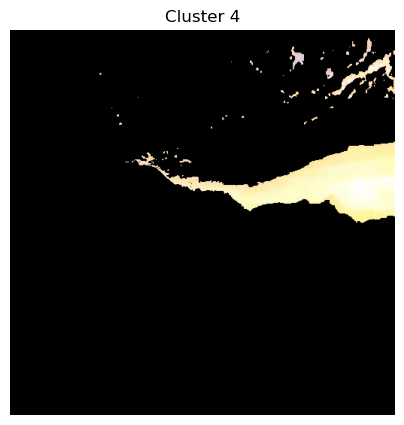

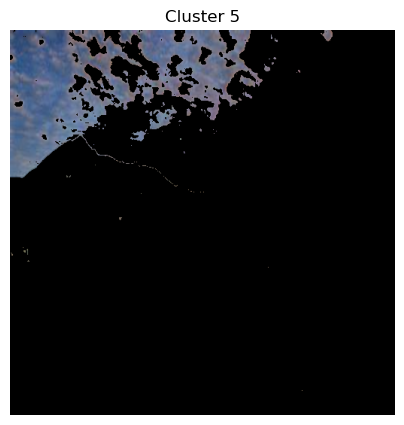

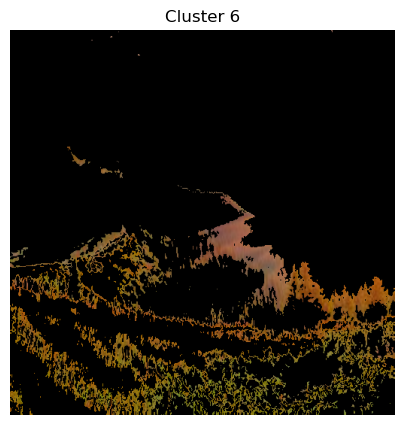

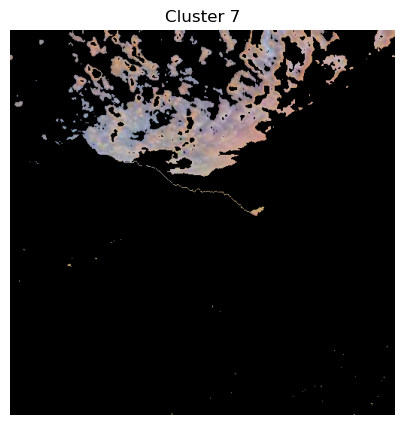

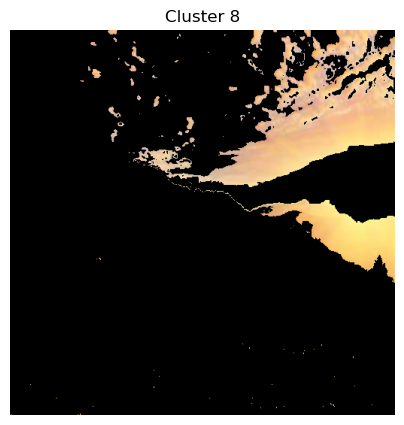

Enter the number of clusters (k): 5
Select a cluster index: 2
Segmented image saved as segmented_image.jpg
Masked cluster 2 image saved as masked_cluster_2.jpg


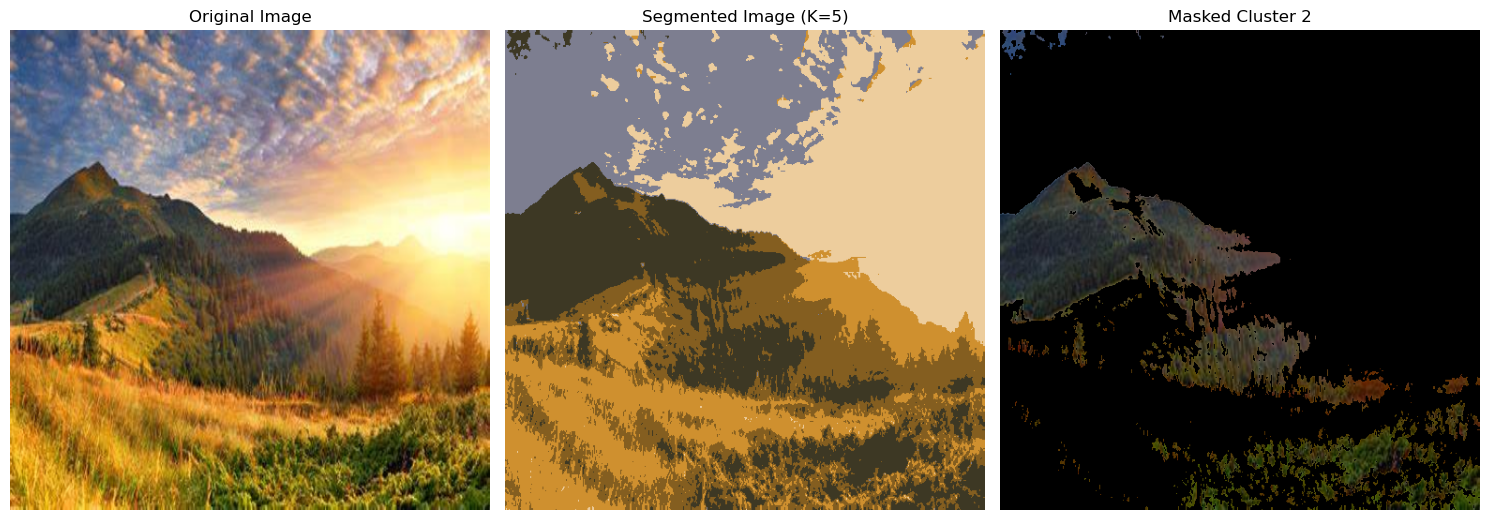

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load and preprocess the image
def load_image(image_path, resize_dim=(512, 512)):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file '{image_path}' not found!")
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return cv2.resize(image_rgb, resize_dim)

# Perform K-means clustering
def apply_kmeans(image, k, criteria):
    pixel_values = image.reshape((-1, 3)).astype(np.float32)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented = centers[labels.flatten()].reshape(image.shape)
    return segmented, labels, centers

# Mask a specific cluster
def mask_cluster(image, labels, cluster, k):
    if cluster < 0 or cluster >= k:
        raise ValueError(f"Cluster index must be in range 0 to {k-1}.")
    masked = np.copy(image).reshape((-1, 3))
    masked[labels.flatten() != cluster] = [0, 0, 0]
    return masked.reshape(image.shape)
# Step: Display all clusters
print("\nDisplaying all clusters:")

for c in range(k):  # Iterate through all clusters
    # Create a copy of the original image's RGB values
    temp_mask = np.copy(image_rgb).reshape((-1, 3))
    
    # Set all pixels not in the current cluster to black
    temp_mask[labels.flatten() != c] = [0, 0, 0]
    
    # Reshape the image back to its original dimensions
    temp_mask = temp_mask.reshape(image_rgb.shape)
    
    # Display the current cluster
    plt.figure(figsize=(5, 5))
    plt.title(f"Cluster {c}")
    plt.imshow(temp_mask)
    plt.axis("off")
    plt.show()

# Save and display images
def save_and_display_images(image, segmented, masked, k, cluster):
    cv2.imwrite("segmented_image.jpg", cv2.cvtColor(segmented, cv2.COLOR_RGB2BGR))
    print("Segmented image saved as segmented_image.jpg")
    cv2.imwrite(f"masked_cluster_{cluster}.jpg", cv2.cvtColor(masked, cv2.COLOR_RGB2BGR))
    print(f"Masked cluster {cluster} image saved as masked_cluster_{cluster}.jpg")
    
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.title(f"Segmented Image (K={k})")
    plt.imshow(segmented)
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.title(f"Masked Cluster {cluster}")
    plt.imshow(masked)
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Main function
if __name__ == "__main__":
    img_path = "C:\\Users\\Venu Kumar S\\OneDrive\\Desktop\\IC.jpg"  # Replace this with your image's path
    k = int(input("Enter the number of clusters (k): "))
    cluster_id = int(input("Select a cluster index: "))
    
    image_rgb = load_image(img_path)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    segmented_image, labels, _ = apply_kmeans(image_rgb, k, criteria)
    masked_image = mask_cluster(image_rgb, labels, cluster_id, k)
    save_and_display_images(image_rgb, segmented_image, masked_image, k, cluster_id)

Optimal number of clusters (k) found: 10


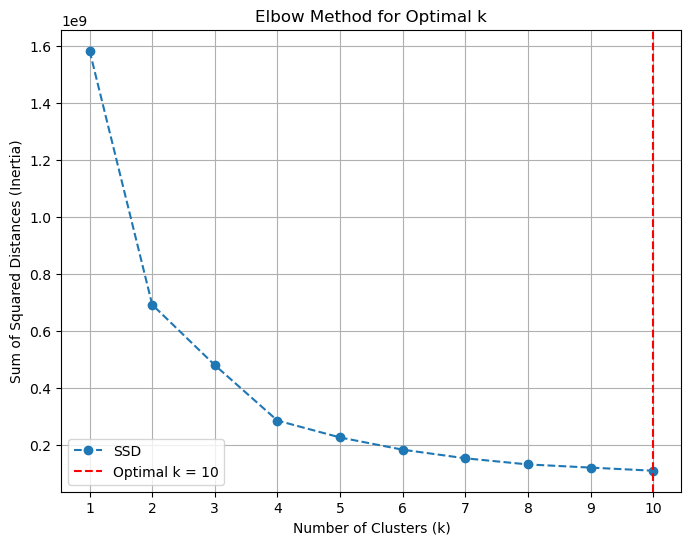

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Read the image
image_path = "C:\\Users\\Venu Kumar S\\OneDrive\\Desktop\\IC.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, channels)
pixel_values = image.reshape((-1, 3)).astype(np.float32)

# Define criteria for K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# List to store the sum of squared distances (inertia)
ssd = []

# Test different values of k (from 1 to 10)
k_values = range(1, 11)
for k in k_values:
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Compute the sum of squared distances (SSD)
    ssd.append(np.sum((pixel_values - centers[labels.flatten()]) ** 2))

# Find the optimal k using the Elbow Method
def find_elbow_alternate(ssd):
    # Compute the first and second derivatives of SSD
    diff1 = np.gradient(ssd)  # First derivative
    diff2 = np.gradient(diff1)  # Second derivative
    # Use local minima of second derivative to find the "elbow"
    elbow_index = argrelextrema(diff2, np.less)[0]
    if len(elbow_index) > 0:
        return k_values[elbow_index[0]]
    return k_values[-1]  # Default to the largest k if no clear elbow is found

# Get the optimal k value
optimal_k = find_elbow_alternate(ssd)
print(f"Optimal number of clusters (k) found: {optimal_k}")

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, ssd, marker='o', linestyle='--', label='SSD')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()